![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
# Importación de librerías
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [4]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [5]:
# Celda 1.1
# Calcula el promedio de la columna 'total' para cada temporada en el DataFrame de bicicletas
season_total = bikes.groupby('season').total.mean()
season_total

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [6]:
season_total.describe()

count      4.000000
mean     191.250013
std       51.994766
min      116.343261
25%      178.327037
50%      207.119834
75%      220.042810
max      234.417124
Name: total, dtype: float64

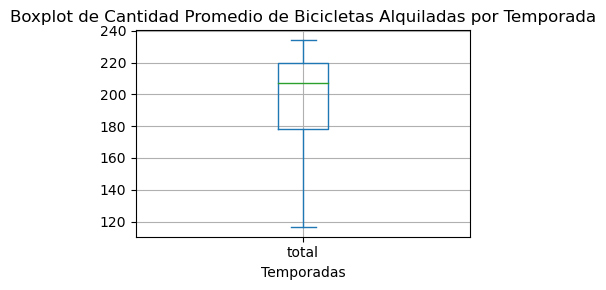

In [7]:
season_total.plot.box(figsize=(4, 3))

# Títulos y etiquetas de los ejes
plt.title('Boxplot de Cantidad Promedio de Bicicletas Alquiladas por Temporada')
plt.xlabel('Temporadas')

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis descriptivo sobre  la variable `season`**
Al analizar las estadísticas descriptivas de los datos agrupados por temporada y su valor promedio de la columna total, se destaca que el valor promedio máximo se alcanza en verano (season = 3), lo que sugiere que esta es la temporada en la que se alquilan más bicicletas, seguida por primavera. Por otro lado, la temporada en la que se alquilan menos bicicletas, con el valor mínimo promedio, es invierno (season = 1), como era de esperar, probablemente debido a condiciones climáticas más frías.

Adicionalmente, en promedio se alquilan 191 bicicletas, y a partir de la mediana se deduce que aproximadamente la mitad de los días registraron un total de alquileres de bicicletas por encima de 207.

Respecto a los percentiles, al estar la mediana más cerca del percentil 75 que del percentil 25 y alejados del valor minimo, se sugiere que hay una mayor concentración de observaciones con valores más altos en comparación con los valores más bajos dentro de la distribución de los datos.

In [8]:
# Celda 1.2
# Calcula el promedio de la columna 'total' para cada hora
hour_total = bikes.groupby('hour').total.mean()
hour_total

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [9]:
hour_total.describe()

count     24.000000
mean     190.742045
std      133.245822
min        6.407240
25%       70.979121
50%      211.895604
75%      256.828399
max      468.765351
Name: total, dtype: float64

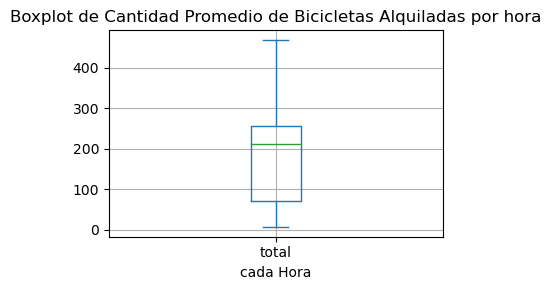

In [10]:
hour_total.plot.box(figsize=(4, 3))

# Títulos y etiquetas de los ejes
plt.title('Boxplot de Cantidad Promedio de Bicicletas Alquiladas por hora')
plt.xlabel('cada Hora')

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()

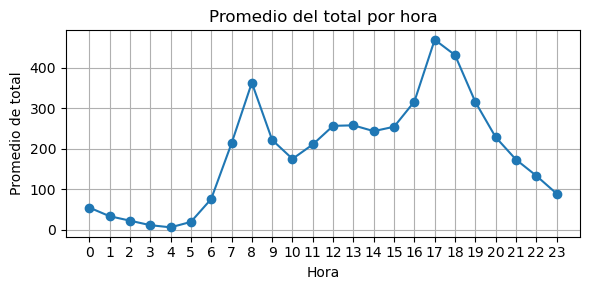

In [11]:
plt.figure(figsize=(6, 3))
plt.plot(hour_total.index, hour_total.values, marker='o', linestyle='-')

# Títulos y etiquetas de los ejes
plt.title('Promedio del total por hora')
plt.xlabel('Hora')
plt.ylabel('Promedio de total')

plt.grid(True)
plt.xticks(hour_total.index.astype(int))
plt.tight_layout()  # Ajustar diseño
plt.show()

**Análisis descriptivo sobre  la variable `hour`**
Al analizar las estadísticas descriptivas de los datos agrupados por hora y su valor promedio de la columna total, se destaca que el valor promedio máximo se registra a las 17 horas, lo que indica que esta es la hora de mayor demanda de alquiler de bicicletas. En contraste, la hora con el menor promedio de alquileres corresponde a las 4 de la mañana.

El diagrama de caja revela que en la mayoría de las horas (75%), el número de alquileres no supera las 257 bicicletas, lo que sugiere que son pocas las horas en las que se alcanza un alto nivel de alquiler. Esta observación se confirma con la segunda gráfica, donde se observa un pico de alquileres a las 8 de la mañana, y otro entre las 16 y 19 horas. Este patrón era esperado, ya que estas últimas horas corresponden al traslado de las personas hacia y desde el trabajo u otros lugares, respectivamente.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

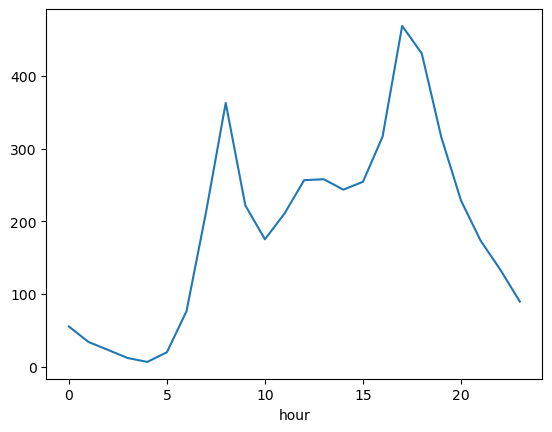

In [12]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

count     24.000000
mean     114.642351
std       83.500331
min        3.336634
25%       39.117257
50%      123.498253
75%      159.508772
max      283.456140
Name: total, dtype: float64

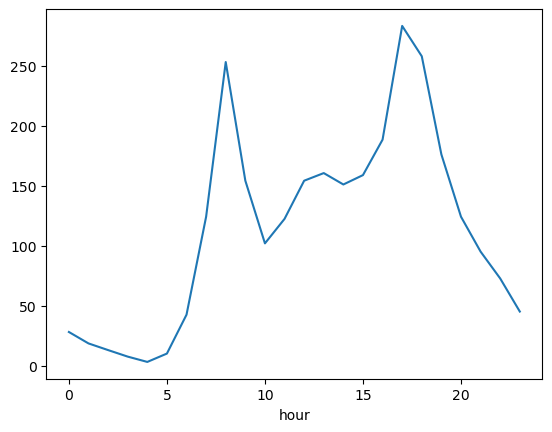

In [13]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes_season_1 = bikes.copy()
bikes_season_1 = bikes_season_1[bikes_season_1.season == 1]
bikes_season_1.groupby('hour').total.mean().plot()
bikes_season_1.groupby('hour').total.mean().describe()

count     24.000000
mean     234.193830
std      159.471610
min        8.087719
25%       91.504386
50%      253.793860
75%      307.223684
max      565.385965
Name: total, dtype: float64

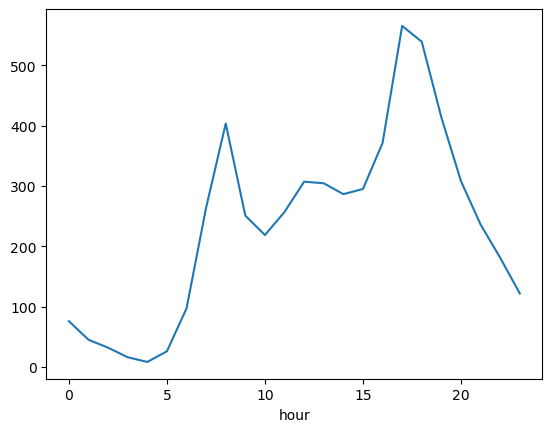

In [14]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes_season_3 = bikes.copy()
bikes_season_3 = bikes_season_3[bikes_season_3.season == 3]
bikes_season_3.groupby('hour').total.mean().plot()
bikes_season_3.groupby('hour').total.mean().describe()

**Hallazgos y análisis**
A pesar de que en ambos casos (invierno=1 y verano=3) se conserva la tendencia, de un aumento en el alquiler alrededor de las 8 horas, y entre las 16 y 19 horas; se observa que en invierno el número de bicicletas alquiladas en el primer pico es ligeramente inferior al segundo pico, en comparación con lo observado en verano. Sin embargo, el número de bicicletas alquiladas a cualquier hora del dia en verano es mayor que en invierno. Por ejemplo, en la primera gráfica correspondiente a season=1 (invierno), el menor valor es 3 y el máximo es 283; mientras que en la segunda gráfica (verano) el menor valor es 8 y el máximo es 565 bicicletas alquiladas.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [15]:
# Celda 3
bikes_model = bikes.copy().reset_index()
bikes_model_or = bikes_model[["season", "hour", "total"]]
bikes_model_dum = bikes_model_or.copy()

# Creación de variables dummies, ya que season es categórica y eliminación de una de esas variables para evitar redundancia de información
season_dummies = pd.get_dummies(bikes_model_dum['season'], prefix='season').astype(int)
bikes_model_dum = pd.concat([bikes_model_or, season_dummies], axis=1)
bikes_model_dum = bikes_model_dum.drop(["season", "season_1"], axis=1)

# Separación de variables predictoras (X) y variable de interes (y)
X_dum = bikes_model_dum[["season_2", "season_3", "season_4", "hour"]]
y_dum = bikes_model_dum[["total"]]

In [16]:
#  Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_dum, y_dum, test_size=0.33, random_state=42)

# Realización y entrenamiento de un modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

coeficientes_lr = pd.DataFrame({'Característica': X_dum.columns, 'Coeficiente': lr.coef_[0]})
coeficientes_lr = pd.concat([pd.DataFrame({'Característica': 'Intercepto', 'Coeficiente': lr.intercept_}, index=[0]), coeficientes_lr]).reset_index(drop=True)
coeficientes_lr

,Característica,Coeficiente
0,Intercepto,-7.671323
1,season_2,99.030198
2,season_3,115.710367
3,season_4,90.637705
4,hour,10.687678


In [17]:
# Predicción utilizando el modelo lr
prediccion_lr = lr.predict(X_test)

# Evaluación del desempeño
MSE_lr=np.average(np.square(prediccion_lr-y_test))
print(f'MSE_lr: {MSE_lr}')
RMSE_lr = np.sqrt(MSE_lr)
print(f'RMSE_lr: {RMSE_lr}')

MSE_lr: 25366.611967658606
RMSE_lr: 159.26899248648058


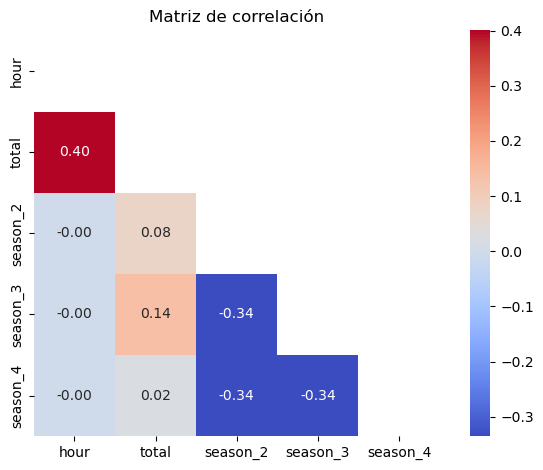

In [18]:
import seaborn as sns
corr = bikes_model_dum.corr()
# Crear una máscara triangular superior
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr.mask(mask), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de correlación')
plt.tight_layout()

**Interpretación de los coeficientes**

* Por otra parte, el intercepto (-7.7) es el valor esperado del número de bicilcetas cuando todas las características son cero, sin embargo no tiene interpretación relevante en este caso.
* El coeficiente asociado a la variable season_4 (otoño) es 90.64, esto significa que en comparación con la estación de referencia (estación 1=invierno), se espera que el número de bicicletas alquiladas aumente en promedio en 91 unidades durante esta temporada.
* El coeficiente asociado a la variable season_2 (primavera) es 99.03, esto significa que en comparación con la estación de referencia (estación 1=invierno), se espera que el número de bicicletas alquiladas aumente en promedio en 99 unidades durante esta temporada.
*  El coeficiente asociado a la variable season_3 (verano) es 115.7, esto significa que en comparación con la estación de referencia (estación 1=invierno), se espera que el número de bicicletas alquiladas aumente en promedio en 116 unidades durante esta temporada.
* En cuanto a la variable hour, el coeficiente asociado es 10.69. Esto significa que, manteniendo todas las demás características constantes, se espera que el número de bicicletas alquiladas aumente en promedio en 11 unidades por cada unidad de aumento en la hora del día.

**Limitaciones de la Regresión Lineal**

La regresión lineal asume una relación lineal entre las variables predictoras y la variable objetivo, en este caso el número de bicicletas alquiladas. Sin embargo, la relación entre las características del alquiler de bicicletas (la hora del día y la estación) y el número de bicicletas alquiladas puede no ser lineal. Esto se observa en la matriz de correlación, donde los coeficientes son muy bajos, y en las gráficas previas. Por lo tanto, la regresión lineal puede no capturar efectos de interacción entre las variables, como los picos de alquiler en ciertos rangos horarios.


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [19]:
X_or = bikes_model_or[["season", "hour"]]
y_or = bikes_model_or[["total"]]

#  Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test
XTrain, Xtest, yTrain, ytest = train_test_split(X_or, y_or, test_size=0.33, random_state=42)

In [20]:
# Celda 4
def gini(y):
    #verifica si el número de filas es 0
    if y.shape[0] == 0:
        return 0
    else:
        #formula del gini 1 - ((p1)^2 + (p2)^2)) # Cuando hay dos clases
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
def gini_impurity(X_col, y, split): #(columna_analizar, y, partición)
    
    # realiza la partición y divide el set
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    # calcula el numero de observaciones en cada partición
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    # calcula el gini inicial y en cada partición (left y right)
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    # calcula la ganancia ponderada al hacer la partición
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    features = range(X.shape[1])
    best_split = [0, 0, 0]  # j, split, gain
    
    for j in features:
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
            
            # Convertir a tipo de dato numérico
            gain = float(gain)
            
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación (1.)
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain: #(2.)
        return tree
    if max_depth is not None: #(3.)
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    # Hace que abra cada una de las ramas hasta que se llegue a uno de los criterios de parada
    """"Los cirterios de parada son:
            1. Que solo haya una observación
            2. Que tengamos menor ganancia que la ganancia minima para poder partir
            3. Que hayamos abierto más veces de las que deseamos abrir
    
    """
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [21]:
tree_or = tree_grow(XTrain, yTrain, level=0, min_gain=0.001, max_depth=5, num_pct=10)
tree_or

{'y_pred': 1,
 'y_prob': total    191.809321
 dtype: float64,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 7293,
 'gain': 18795.802388830125,
 'sl': {'y_pred': 1,
  'y_prob': total    55.056944
  dtype: float64,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 2439,
  'gain': 7213.251123379721,
  'sl': {'y_pred': 1,
   'y_prob': total    32.666356
   dtype: float64,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 2141,
   'gain': 683.5242565391445,
   'sl': {'y_pred': 1,
    'y_prob': total    25.120305
    dtype: float64,
    'level': 3,
    'split': [1, 2.0],
    'n_samples': 1835,
    'gain': 340.2860885367045,
    'sl': {'y_pred': 1,
     'y_prob': total    43.247191
     dtype: float64,
     'level': 4,
     'split': [0, 2.0],
     'n_samples': 621,
     'gain': 249.63702359644776,
     'sl': {'y_pred': 1,
      'y_prob': total    23.880503
      dtype: float64,
      'level': 5,
      'split': -1,
      'n_samples': 157,
      'gain': 72.28167140788446},
     'sr': {'y_pr

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [50]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 20)

# Lista para guardar los valores del MSE para cada valor de máxima profundidad (max_depth)
rmse_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeRegressor de la librería sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    # Realiza validación cruzada y guarda el resultado
    mse_scores = -cross_val_score(clf, XTrain, yTrain, cv=10, scoring='neg_mean_squared_error')
    rmse_scores.append(np.sqrt(mse_scores.mean()))

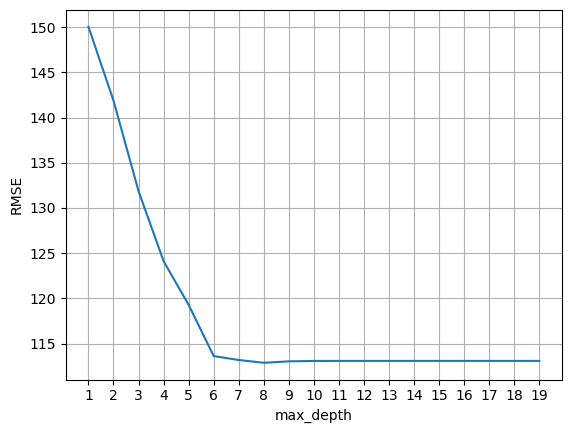

In [51]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('max_depth')
plt.grid(True)
plt.xticks(max_depth_range)
plt.ylabel('RMSE')
plt.show()

In [52]:
# Mejor RMSE (desempeño del modelo) y su correspondiente max_depth
best_rmse, best_depth = sorted(zip(rmse_scores, max_depth_range))[0]
best_rmse, best_depth

(112.86917246981318, 8)

In [70]:
from sklearn.model_selection import GridSearchCV
# Definir los hiperparámetros a optimizar
param_grid = {
    'max_depth': [5, 6, 7, 8, 9, 10, 11],  # Profundidades máximas a probar
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas para estar en un nodo hoja
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo a los datos
grid_search.fit(XTrain, yTrain)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Imprimir los mejores parámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Calcular la puntuación de validación cruzada del mejor modelo
best_score = grid_search.best_score_
print("Mejor puntuación de validación cruzada:", best_score)

Mejores hiperparámetros: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor puntuación de validación cruzada: -12757.935036935818


In [71]:
# Crear un nuevo árbol de decisión con los mejores hiperparámetros
tree_skl = DecisionTreeRegressor(max_depth=8, min_samples_leaf=1, min_samples_split=2)

# Entrenar el árbol con los datos de entrenamiento
tree_skl.fit(XTrain, yTrain)

DecisionTreeRegressor(max_depth=8)

In [76]:
# Predicción utilizando el modelo TR (Decision Tree Regressor)
prediccion_tr = tree_skl.predict(Xtest)

# Evaluación del desempeño
MSE_tr = np.average(np.square(prediccion_tr-ytest.squeeze()))
print(f'MSE_lr: {MSE_tr}')
RMSE_tr = np.sqrt(MSE_tr)
print(f'RMSE_lr: {RMSE_tr}')

MSE_lr: 13659.493203354376
RMSE_lr: 116.87383455399406


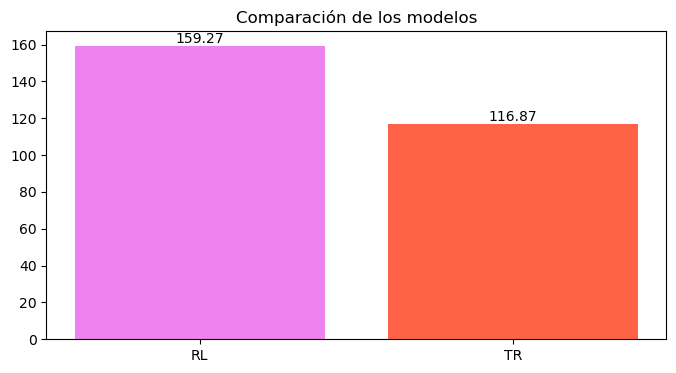

In [77]:
# Comparacion de métricas
ejeX = ['RL', 'TR']
ejeY = [round(RMSE_lr, 2), round(RMSE_tr, 2)]

colores = ['violet', 'tomato']

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Comparación de los modelos")
ax.bar(ejeX, ejeY, color=colores)
def addlabels(x, y, ax):
    for i in range(len(x)):
        ax.text(i, y[i], y[i], ha='center', va='bottom')

addlabels(ejeX, ejeY, ax)
plt.show()

**Comparación de los modelos e interpretación**

Los resultados muestran una clara mejora en el desempeño del árbol de decisión en comparación con la regresión lineal en términos de MSE (Error Cuadrático Medio) y RMSE (Raíz del Error Cuadrático Medio). Por lo que estos resultados sugieren que el árbol de decisión es más efectivo para modelar y predecir los datos en este conjunto específico en comparación con la regresión lineal, ya que los árboles de decisión capturan relaciones no lineales y complejas entre las características y el objetivo, en este caso las varaibles Hora y Season, y la variable total, por lo que permite adaptarse mejor a la estructura subyacente de los datos en comparación con la regresión lineal, ya que esta estima una relacion lineal.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [2]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [6]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [33]:
y.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
Popular,,
1,3000,0.5
0,3000,0.5


In [7]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

##### Árbol de decisión

In [18]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a optimizar
param_grid = {
    'max_depth': [2, 5, 8, 10],  # Profundidades máximas a probar
    'min_samples_split': [2, 3, 4, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas para estar en un nodo hoja
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model_AD = grid_search.best_estimator_

# Imprimir los mejores parámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Calcular la puntuación de validación cruzada del mejor modelo
best_score = grid_search.best_score_
print("Mejor puntuación de validación cruzada (accuracy):", best_score)

Mejores hiperparámetros: {'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor puntuación de validación cruzada (accuracy): 0.6242222222222222


In [23]:
# Entrenamiento del modelo
clf_ad = DecisionTreeClassifier(max_depth=2, max_features= None, min_samples_leaf=1, min_samples_split=2)
clf_ad.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [30]:
# Realizar predicciones en los datos de prueba
prediccion_clf_ad = clf_ad.predict(X_test)

# Calcular la métrica de Accuracy
accuracy_ad = accuracy_score(y_test, prediccion_clf_ad)
print("Accuracy:", accuracy_ad)

# Calcular la métrica de F1-Score
f1_ad = f1_score(y_test, prediccion_clf_ad)
print("F1-Score:", f1_ad)

Accuracy: 0.6453333333333333
F1-Score: 0.6448598130841121


##### Regresión Logística

In [29]:
# Construcción del modelo y estimaciones
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [31]:
prediccion_logreg = logreg.predict(X_test)

# Calcular la métrica de Accuracy
accuracy_logreg = accuracy_score(y_test, prediccion_logreg)
print("Accuracy:", accuracy_logreg)

# Calcular la métrica de F1-Score
f1_logreg = f1_score(y_test, prediccion_logreg)
print("F1-Score:", f1_logreg)

Accuracy: 0.6126666666666667
F1-Score: 0.609280430396772


**Comparación e interpretación**

El accuracy indica la proporción de predicciones correctas realizadas por el modelo. En este caso, el modelo de árbol de clasificación logró una precisión del 64.53%, lo que significa que aproximadamente el 64.53% de las predicciones realizadas por el modelo fueron correctas en comparación con las etiquetas reales, mientras que elmodelo de regresión logística tuvo un accuracy menor del 61.27%.

Por ortra parte, el F1-Score es una medida que combina tanto la precisión como el recall (recuperación) del modelo. En este caso, el F1-Score del modelo de árbol de clasificación es ligeramente superior al de la regresión logistica, lo que indica un mejor equilibrio entre precisión y recall en la clasificación.

En ambas métricas el modelo de árbol de clasificación supera al modelo de regresión logística en términos de rendimiento predictivo en este conjunto de datos, por lo tanto, el primer modelo predice mejor si una noticia va a ser popular o no, dada la cantidad de reacciones en redes sociales.


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [54]:
# Celda 7
# Creación de 100 muestras de bootstrap
n_estimators = 300
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

# Entrenamiento de 100 modelos con las 100 muestras boostrap
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

models = {}
for i in range(n_estimators):
    if i < 100:
        models[i] = DecisionTreeClassifier(max_depth=2, random_state=seeds[i])
        models[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    if i >= 100 and i < 200:
        models[i] = DecisionTreeClassifier(min_samples_leaf=1, random_state=seeds[i])
        models[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    if i >= 200 and i < 300:
        models[i] = LogisticRegression(random_state=seeds[i])
        models[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [76]:
# Predicción para los datos del set de test con los modelos del grupo 1
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = models[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,1,1,0,0,0,0
2520,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# Votación mayoritaria para el grupo 1
y_pred_g1 = (y_pred_df.iloc[:, :100].sum(axis=1) >= (100 / 2)).astype(int)

# Desempeño al hacer votación mayoritaria
f1_g1 = metrics.f1_score(y_pred_g1, y_test)
print('F1-Score grupo 1 (árboles de decisión donde max_depth=2)', f1_g1)

accuracy_g1 = metrics.accuracy_score(y_pred_g1, y_test)
print('Accuracy grupo 1 (árboles de decisión donde max_depth=2)', accuracy_g1)

F1-Score grupo 1 (árboles de decisión donde max_depth=2) 0.6448598130841121
Accuracy grupo 1 (árboles de decisión donde max_depth=2) 0.6453333333333333


In [88]:
# Votación mayoritaria para el grupo 2
y_pred_g2 = (y_pred_df.iloc[:, 101:200].sum(axis=1) >= (100 / 2)).astype(int)

# Desempeño al hacer votación mayoritaria
f1_g2 = metrics.f1_score(y_pred_g2, y_test)
print('F1-Score grupo 2 (árboles de decisión donde min_samples_leaf=1)', f1_g2)

accuracy_g2 = metrics.accuracy_score(y_pred_g2, y_test)
print('Accuracy grupo 2 (árboles de decisión donde min_samples_leaf=1)', accuracy_g2)

F1-Score grupo 2 (árboles de decisión donde min_samples_leaf=1) 0.6592833876221499
Accuracy grupo 2 (árboles de decisión donde min_samples_leaf=1) 0.6513333333333333


In [89]:
# Votación mayoritaria para el grupo 3
y_pred_g3 = (y_pred_df.iloc[:, 201:300].sum(axis=1) >= (100 / 2)).astype(int)

# Desempeño al hacer votación mayoritaria
f1_g3 = metrics.f1_score(y_pred_g3, y_test)
print('F1-Score grupo 3 (regresiones logísticas)', f1_g3)

accuracy_g3 = metrics.accuracy_score(y_pred_g3, y_test)
print('Accuracy grupo 3 (regresiones logísticas)', accuracy_g3)

F1-Score grupo 3 (regresiones logísticas) 0.6114130434782609
Accuracy grupo 3 (regresiones logísticas) 0.6186666666666667


-------------------------------

In [126]:
# Votación mayoritaria para todos los grupos
y_pred_vm = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(int)

# Desempeño al hacer votación mayoritaria
f1_vm = metrics.f1_score(y_pred_vm, y_test)
print('F1-Score todos los grupos:', f1_vm)

accuracy_vm = metrics.accuracy_score(y_pred_vm, y_test)
print('Accuracy todos los grupos:', accuracy_vm)

F1-Score todos los grupos: 0.6278755074424899
Accuracy todos los grupos: 0.6333333333333333


**Análisis de resultados**

Se observa que los valores de F1-Score y Accuracy son similares en los cuatro casos (grupo 1, grupo 2, grupo 3 y todos los grupos), sin embargo, a pesar de que se podria esperar que el de ensamblaje tenga el mejor desempeño, en este caso el grupo 3 (modelos de regresión logistica) obtuvo un mejor F1-Score y Accuracy. 

Esta discrepancia podría deberse a que, en el ensamblaje de modelos, al considerar dos grupos de árboles de decisión, es posible que cometan errores similares, lo que podría conducir a una votación mayoritaria incorrecta y, por lo tanto, a predicciones menos precisas.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

Text(0.5, 1.0, 'OOB error of each model')

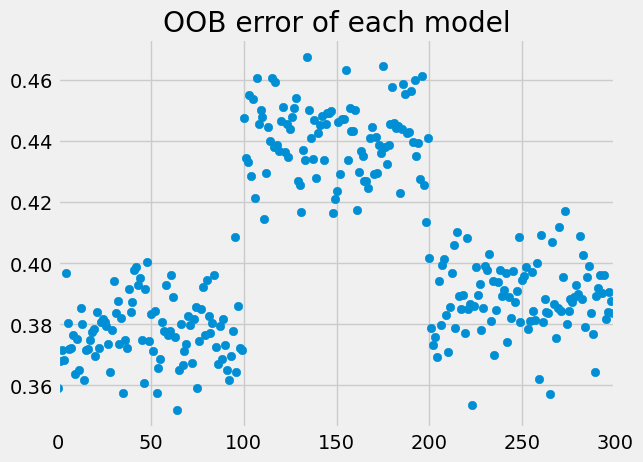

In [153]:
# Celda 8
samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = models[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
    
# Visualización de OOB para cada modelo
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each model')

In [154]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB Grupo 1
alpha_g1 = (1 - errors[:100]) / (1 - errors[:100]).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_g1 = ((y_pred_df.iloc[:, :100]) * alpha_g1).sum(axis=1)
weighted_sum_g1.head(10)

1483         1.0
2185         1.0
2520         1.0
3721         1.0
3727    0.019362
4524     0.98041
234     0.019884
4735    0.009503
5839    0.040498
2939    0.989858
dtype: object

In [155]:
# Desempeño al hacer votación ponderada
y_pred_g1_vp = (weighted_sum_g1 >= 0.5).astype(int)

# Desempeño al hacer votación mayoritaria
f1_g1_vp = metrics.f1_score(y_pred_g1_vp, y_test)
print('F1-Score grupo 1 (árboles de decisión donde max_depth=2)', f1_g1_vp)

accuracy_g1_vp = metrics.accuracy_score(y_pred_g1_vp, y_test)
print('Accuracy grupo 1 (árboles de decisión donde max_depth=2)', accuracy_g1_vp)

F1-Score grupo 1 (árboles de decisión donde max_depth=2) 0.6448598130841121
Accuracy grupo 1 (árboles de decisión donde max_depth=2) 0.6453333333333333


In [156]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB Grupo 2
alpha_g2 = (1 - errors[101:200]) / (1 - errors[101:200]).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_g2 = ((y_pred_df.iloc[:, 101:200]) * alpha_g2).sum(axis=1)
weighted_sum_g2.head(10)

1483    0.716137
2185     0.65678
2520    0.557123
3721    0.665656
3727    0.264129
4524    0.687041
234     0.111664
4735    0.394336
5839    0.475409
2939    0.433459
dtype: object

In [157]:
weighted_sum_g2

1483    0.716137
2185     0.65678
2520    0.557123
3721    0.665656
3727    0.264129
          ...   
3077    0.515049
5166    0.242287
2227    0.595667
5684      0.3857
1937    0.353842
Length: 1500, dtype: object

In [158]:
# Desempeño al hacer votación ponderada
y_pred_g2_vp = (weighted_sum_g2 >= 0.5).astype(int)

# Desempeño al hacer votación mayoritaria
f1_g2_vp = metrics.f1_score(y_pred_g2_vp, y_test)
print('F1-Score grupo 2 (árboles de decisión donde min_samples_leaf=1)', f1_g2_vp)

accuracy_g2_vp = metrics.accuracy_score(y_pred_g2_vp, y_test)
print('Accuracy grupo 2 (árboles de decisión donde min_samples_leaf=1)', accuracy_g2_vp)

F1-Score grupo 2 (árboles de decisión donde min_samples_leaf=1) 0.6592833876221499
Accuracy grupo 2 (árboles de decisión donde min_samples_leaf=1) 0.6513333333333333


In [159]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB Grupo 3
alpha_g3 = (1 - errors[201:300]) / (1 - errors[201:300]).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_g3 = ((y_pred_df.iloc[:, 201:300]) * alpha_g3).sum(axis=1)
weighted_sum_g3.head(10)

1483         1.0
2185    0.508204
2520         1.0
3721         1.0
3727    0.009763
4524         1.0
234          0.0
4735         0.0
5839    0.535901
2939         1.0
dtype: object

In [160]:
# Desempeño al hacer votación ponderada
y_pred_g3_vp = (weighted_sum_g3 >= 0.5).astype(int)

# Desempeño al hacer votación mayoritaria
f1_g3_vp = metrics.f1_score(y_pred_g3_vp, y_test)
print('F1-Score grupo 3 (regresiones logísticas)', f1_g3_vp)

accuracy_g3_vp = metrics.accuracy_score(y_pred_g3_vp, y_test)
print('Accuracy grupo 3 (regresiones logísticas)', accuracy_g3_vp)

F1-Score grupo 3 (regresiones logísticas) 0.6114130434782609
Accuracy grupo 3 (regresiones logísticas) 0.6186666666666667


---------------------------------

In [161]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_all = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_all.head(10)

1483    0.912347
2185    0.724634
2520    0.863245
3721    0.896759
3727    0.091578
4524     0.89348
234     0.044465
4735    0.128146
5839    0.348216
2939    0.821539
dtype: object

In [162]:
# Desempeño al hacer votación ponderada
y_pred_vp = (weighted_sum_all >= 0.5).astype(int)

# Desempeño al hacer votación mayoritaria
f1_vp = metrics.f1_score(y_pred_vp, y_test)
print('F1-Score todos los grupos:', f1_vp)

accuracy_vp = metrics.accuracy_score(y_pred_vp, y_test)
print('Accuracy todos los grupos:', accuracy_vp)

F1-Score todos los grupos: 0.6267029972752044
Accuracy todos los grupos: 0.6346666666666667


**Análisis de resultados**

Se observa que los valores de F1-Score y Accuracy son similares en los cuatro casos (grupo 1, grupo 2, grupo 3 y todos los grupos), y como ocurre en votación mayoritaria (Ejercicio 7), el mejor desempeño es obtenido por el grupo 3 que corresponde a los modelos de regresión logística.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

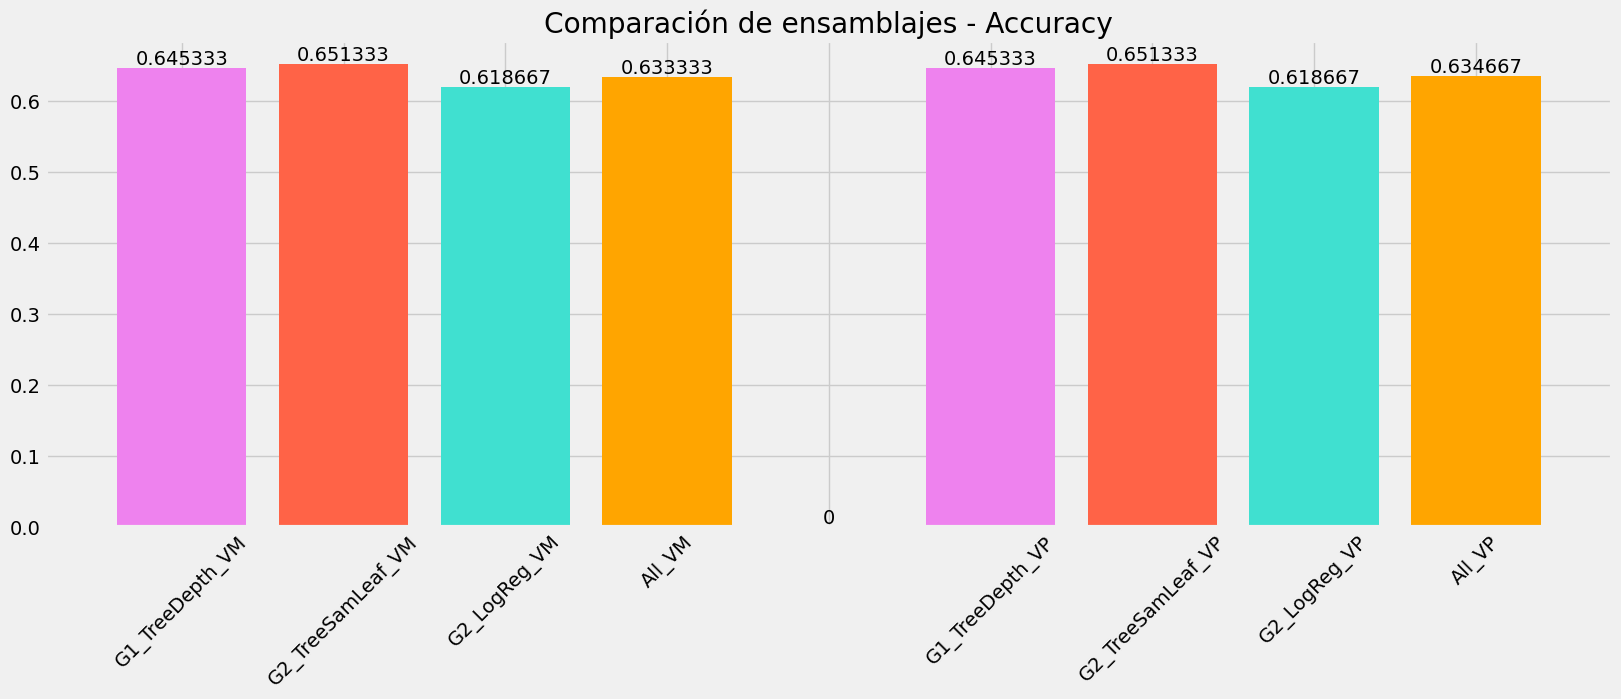

In [169]:
# Celda 9
# Comparacion de métricas
ejeX = ['G1_TreeDepth_VM', 'G2_TreeSamLeaf_VM', 'G2_LogReg_VM', 'All_VM', '',
        'G1_TreeDepth_VP', 'G2_TreeSamLeaf_VP', 'G2_LogReg_VP', 'All_VP',]
ejeY = [round(accuracy_g1, 6), round(accuracy_g2, 6), round(accuracy_g3, 6), round(accuracy_vm, 6), 0,
        round(accuracy_g1_vp, 6), round(accuracy_g2_vp, 6), round(accuracy_g3_vp, 6), round(accuracy_vp, 6)]

colores = ['violet', 'tomato', 'turquoise', 'orange', 'yellow', 'violet', 'tomato', 'turquoise', 'orange']

fig, ax = plt.subplots(figsize=(18, 6))
ax.set_title("Comparación de ensamblajes - Accuracy")
ax.bar(ejeX, ejeY, color=colores)
def addlabels(x, y, ax):
    for i in range(len(x)):
        ax.text(i, y[i], y[i], ha='center', va='bottom')

addlabels(ejeX, ejeY, ax)
plt.xticks(rotation=45)
plt.show()

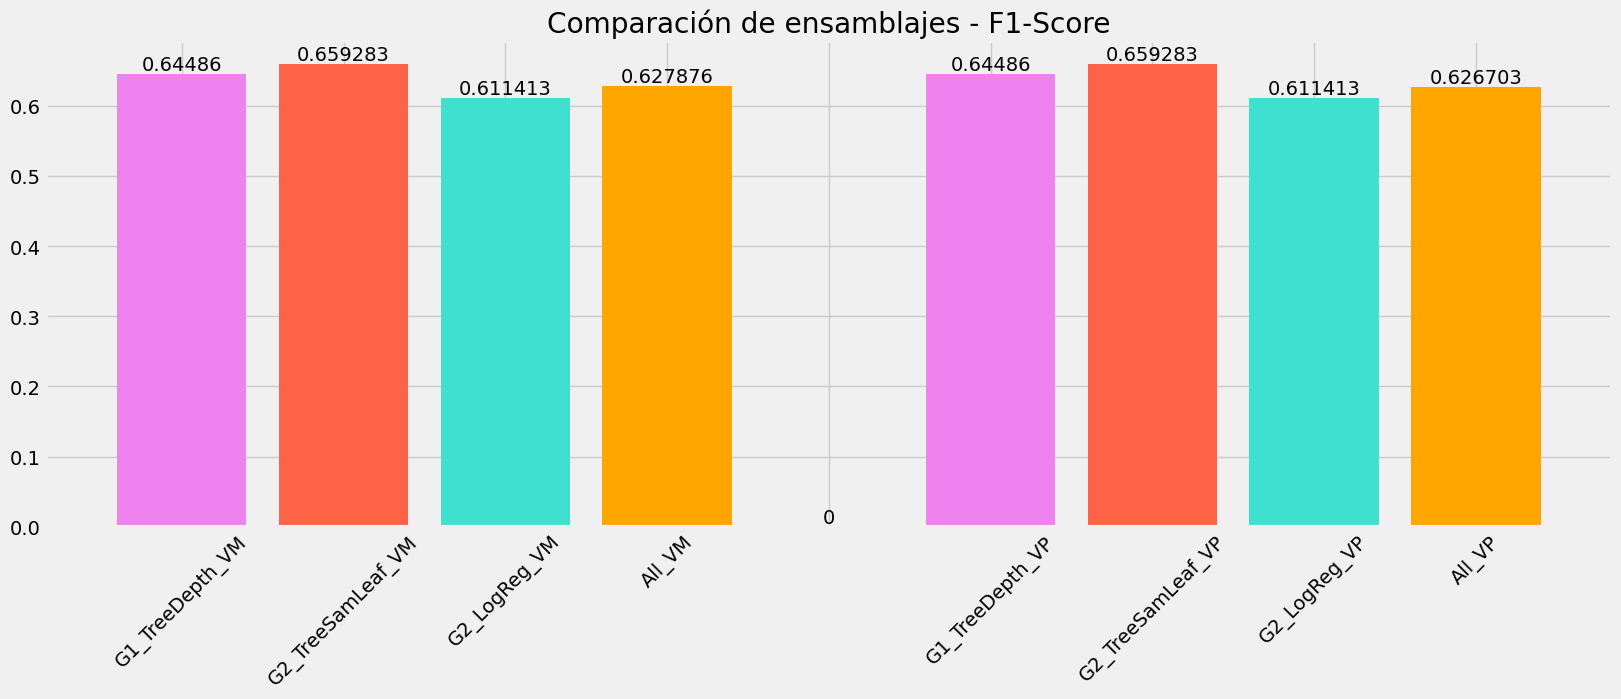

In [170]:
# Comparacion de métricas
ejeX = ['G1_TreeDepth_VM', 'G2_TreeSamLeaf_VM', 'G2_LogReg_VM', 'All_VM', '',
        'G1_TreeDepth_VP', 'G2_TreeSamLeaf_VP', 'G2_LogReg_VP', 'All_VP',]
ejeY = [round(f1_g1, 6), round(f1_g2, 6), round(f1_g3, 6), round(f1_vm, 6), 0,
        round(f1_g1_vp, 6), round(f1_g2_vp, 6), round(f1_g3_vp, 6), round(f1_vp, 6)]

colores = ['violet', 'tomato', 'turquoise', 'orange', 'yellow', 'violet', 'tomato', 'turquoise', 'orange']

fig, ax = plt.subplots(figsize=(18, 6))
ax.set_title("Comparación de ensamblajes - F1-Score")
ax.bar(ejeX, ejeY, color=colores)
def addlabels(x, y, ax):
    for i in range(len(x)):
        ax.text(i, y[i], y[i], ha='center', va='bottom')

addlabels(ejeX, ejeY, ax)
plt.xticks(rotation=45)
plt.show()

**Comparación de resultados y análisis**

Para todos los grupos se obtuvieron los mismos valores tanto con votación mayoritaria como ponderada. Esto probablemente sucede ya que en el caso del ensamblaje de votación ponderada, todas las ponderaciones asignadas a los modelos base son iguales, por lo que esencialmente se reduce al ensamblaje de votación mayoritaria.

Por otra parte, se observa que al evaluar el ensamblaje de los tres grupos, la votación ponderada (All_VP) obtiene un rendimiento superior al de votación mayoritaria (All_VM), tanto en el F1-Score como en el accuracy, esto probablemente se debe a que los errores de las observaciones fuera de la bolsa "out-of-bag" de las regresiones logisticas son menores a los de los árboles de decisión y por lo tanto, al ponderar los valores, estas obtienen un peso mayor mejorando el desempeño de dicho ensamblaje. 